# Homework 1

4. Import the ```boston.csv``` dataset. What variable best predicts Boston area MEDV (median value: this is somewhat outdated data, FYI.)

5. Bootstrap a 95% confidence interval (CI) for the slope of GDPpc in the ```Happy2019.csv``` data. Compare to the 95% CI in the regression table. Now repeat for 99% and  90%. Explain the differences.

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols


# EDA, Visualization, Regression Analysis using OLS

## Draft Data

In [4]:
dr70=pd.read_csv('/Users/mo/Desktop/Desktop/School/USF/Courses/Spring 2021/Statistic Modeling/HW 1 + data/draft70.csv')
dr71=pd.read_csv('/Users/mo/Desktop/Desktop/School/USF/Courses/Spring 2021/Statistic Modeling/HW 1 + data/draft71.csv')


In [5]:
#Add variable in each df
dr70["Year"]="1970"
dr71["Year"]="1971"


In [6]:
dr70.head()


,DayOfYear,DraftNum,Month,Year
0,1,305,1,1970
1,2,159,1,1970
2,3,251,1,1970
3,4,215,1,1970
4,5,101,1,1970


In [7]:
dr71.head()


,DayOfYear,DraftNum,Month,Year
0,1,133,1,1971
1,2,195,1,1971
2,3,336,1,1971
3,4,99,1,1971
4,5,33,1,1971


In [8]:
drafts = pd.concat([dr70,dr71])


In [9]:
drafts.Year.value_counts()


1970    366
1971    365
Name: Year, dtype: int64

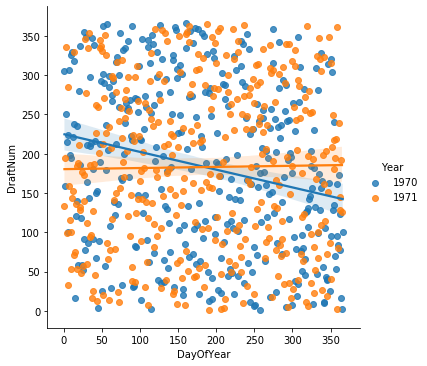

In [10]:
sns.lmplot(data=drafts, x='DayOfYear',y='DraftNum',hue='Year')



In this graph, it does not show any pattern between the two yaers. Although, it has same scattering pattern which does not illustrate anything. One thing to notice is that the blue line for 1970 hasa downward sloping which can tell that that the later DayOfYear the less draft number you get. for 1971, the yellow line shows that it is close to zero sloping where the distribution seems random.

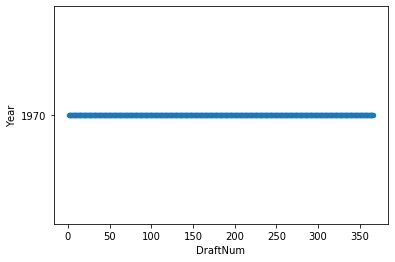

In [11]:
dr70.plot.scatter(x='DraftNum',y='Year')

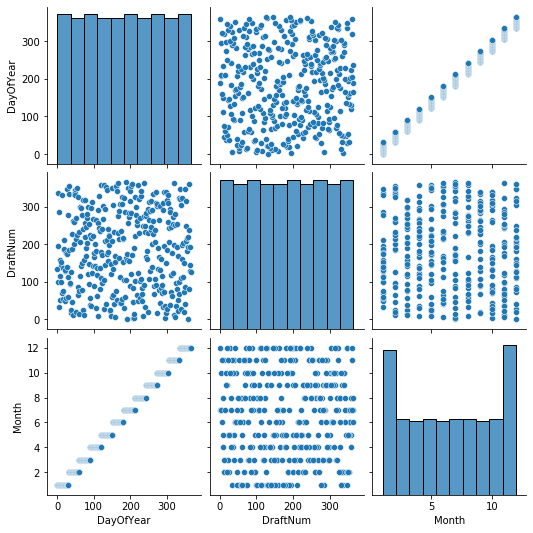

In [12]:
sns.pairplot(dr71)

As we can see both years do not show any pattern.

In [13]:
mod = ols(formula='DraftNum ~ Year', data=dr70)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DraftNum   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                nan
Time:                        00:57:36   Log-Likelihood:                -2225.0
No. Observations:                 366   AIC:                             4452.
Df Residuals:                     365   BIC:                             4456.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    183.5000      5.530     33.181      0.000     172.625     194.375
==============================================================================
Omnibus:                      212.298   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.961
Skew:                           0.000   Prob(JB):                     1.70e-05
Kurtosis:                       1.800   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

for the year of 1970, the model has a zero R-squared which tells us the there is no variability in the data arounf the mean. 

In [14]:
mod = ols(formula='DraftNum ~ Year', data=dr71)
res=mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DraftNum   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 14 Oct 2021   Prob (F-statistic):                nan
Time:                        00:57:36   Log-Likelihood:                -2217.9
No. Observations:                 365   AIC:                             4438.
Df Residuals:                     364   BIC:                             4442.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    183.0000      5.523     33.136      0.000     172.140     193.860
==============================================================================
Omnibus:                      211.536   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.901
Skew:                           0.000   Prob(JB):                     1.76e-05
Kurtosis:                       1.800   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

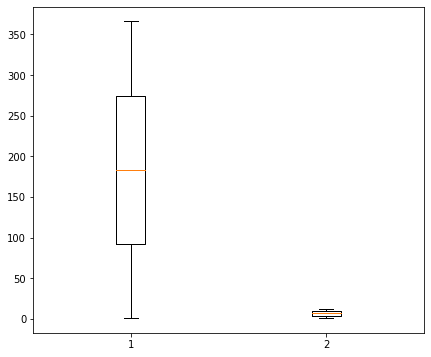

In [15]:
# array of men and women
drft70=drafts['DraftNum'].values
month70=drafts['Month'].values
fig, ax = plt.subplots(figsize=(7,6))
ax.boxplot([drft70,month70])
plt.show()

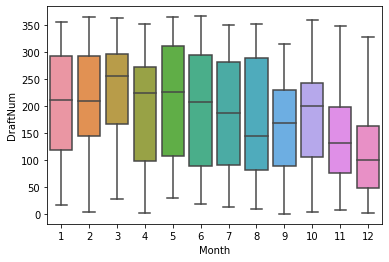

In [16]:
sns.boxplot(x="Month", y="DraftNum", data=dr70)

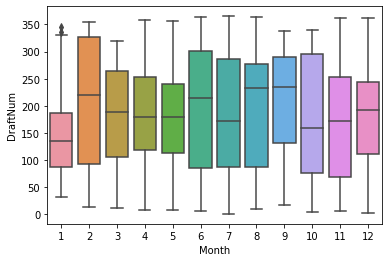

In [17]:
sns.boxplot(x="Month", y="DraftNum", data=dr71)


in both boxplot the data does not show any variablity and clearly 

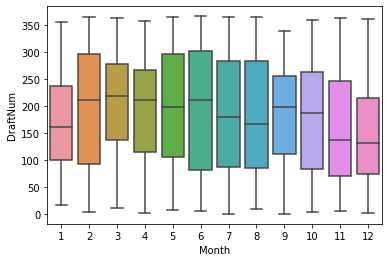

In [18]:
sns.boxplot(x="Month", y="DraftNum", data=drafts)


the box plot shows no pattern even when we have combined by the month for both years. 


# EDA, Visualization, Regression Analysis using OLS

## Data Weight vs Height Regresion analysis

In [19]:
w_h=pd.read_csv('/Users/mo/Desktop/Desktop/School/USF/Courses/Spring 2021/Statistic Modeling/HW 1 + data/weight-height.csv')
w_h


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


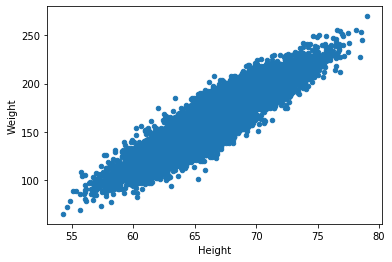

In [20]:
w_h.plot.scatter(x='Height',y='Weight')

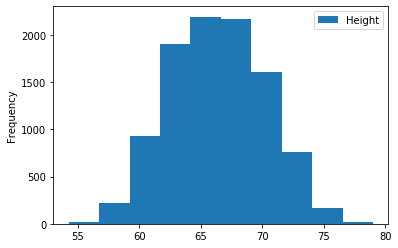

In [21]:
w_h.plot.hist(y="Height", x="Weight")

In [22]:
men   =w_h[w_h['Gender']=="Male"]
women =w_h[w_h['Gender']=="Female"]
men

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
4995,Male,68.860062,177.131052
4996,Male,68.973423,159.285228
4997,Male,67.013795,199.195400
4998,Male,71.557718,185.905909


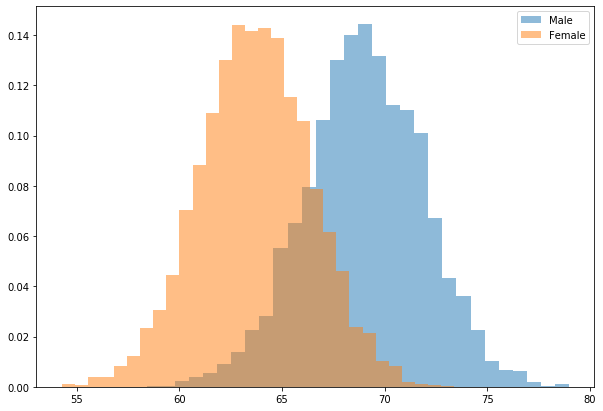

In [23]:
fig, ax = plt.subplots(figsize=(10,7))  # make one subplot (ax) on the figure
ax.hist(men['Height'],bins=30,alpha=0.5,density=True,label='Male')
ax.hist(women['Height'],bins=30,alpha=0.5,density=True,label='Female')
ax.legend(loc='upper right')
plt.show()

In this histogram, we can notice that male mean is higher than female by looking at the shape of distrubution toward right.

In [24]:
mean=w_h[['Gender','Height','Weight']].groupby(['Gender'],as_index=False).mean()
mean

,Gender,Height,Weight
0,Female,63.708774,135.860093
1,Male,69.026346,187.020621


This confirm that male has higher height mean than female

In [25]:
mod = ols(formula='Height ~ Weight', data=men)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                 1.458e+04
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:57:40   Log-Likelihood:                -8940.6
No. Observations:                5000   AIC:                         1.789e+04
Df Residuals:                    4998   BIC:                         1.790e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.6641      0.195    234.718      0.000      45.283      46.046
Weight         0.1249      0.001    120.754      0.000       0.123       0.127
==============================================================================
Omnibus:                        4.547   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.582
Skew:                          -0.067   Prob(JB):                        0.101
Kurtosis:                       2.938   Cond. No.                     1.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-Squared tells us that there is almost 50% variability around the mean which we can defently confirm it in our histogram. the shaded area in the histogram shows that  men and women have similarty in height. The intercept is 

In [26]:
mod = ols(formula='Height ~ Weight', data=women)
res=mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Height   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                 1.297e+04
Date:                Thu, 14 Oct 2021   Prob (F-statistic):               0.00
Time:                        00:57:40   Log-Likelihood:                -8854.7
No. Observations:                5000   AIC:                         1.771e+04
Df Residuals:                    4998   BIC:                         1.773e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.3478      0.145    326.393      0.000      47.063      47.632
Weight         0.1204      0.001    113.885      0.000       0.118       0.122
==============================================================================
Omnibus:                        0.935   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.889
Skew:                          -0.001   Prob(JB):                        0.641
Kurtosis:                       3.065   Cond. No.                         989.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we noticed that both regreasion analysis of men and women, they seem similar and close to each other. The intercept tells us that men has an intercept of 45 which predict that weight is increased by 0.1249. That means, ex every extra 1 pound is multplied by 0.1249 + 45.66 which is a predictor of upwork sloping.
In women result, it has the same pattern result with slightly higher intercept but and lower in the slop of 0.1204 

## Normal Body Temp Data
### is human boday temp is a good predictor of heart rate?


In [27]:
file_p = '/Users/mo/Desktop/Desktop/School/USF/Courses/Spring 2021/Statistic Modeling/Data/normtemp.csv'
temp = pd.read_csv(file_p)
temp

,temp,gender,hr
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73
...,...,...,...
125,99.3,2,68
126,99.4,2,77
127,99.9,2,79
128,100.0,2,78


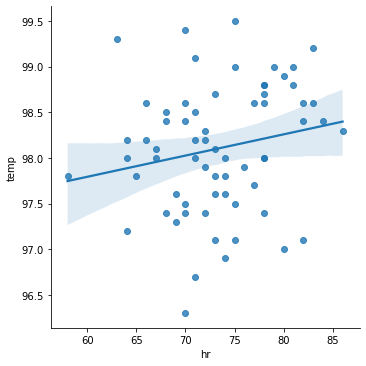

In [28]:
sns.lmplot(y='temp', x='hr', data=temp[temp["gender"]==1])

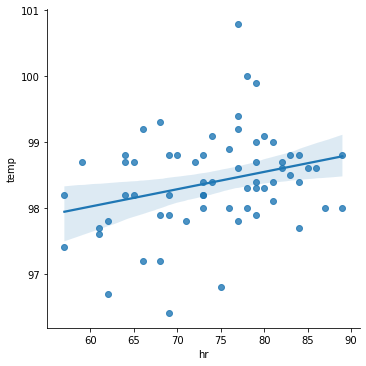

In [29]:
sns.lmplot(y='temp', x='hr', data=temp[temp["gender"]==2])

It does not look like there is a pattern and most of point are scatter arround the noraml hear rate. 

In [30]:
temp.mean()

temp      98.249231
gender     1.500000
hr        73.761538
dtype: float64

by looking at the mean of temp and heart rate, the difference in the mean is very high which is hard to predict since this tells us that the variation are far from each other

## Happy2019 Data

I will Bootstrap a 95% confidence interval (CI) for the slope of GDPpc in the ```Happy2019.csv``` data. Compare to the 95% CI in the regression table. Now repeat for 99% and  90% and explain the differences.

In [46]:
happy = pd.read_csv("/Users/mo/Desktop/Desktop/School/USF/Courses/Spring 2021/Statistic Modeling/Lec2/Happy2019.csv")

In [47]:
happy.columns=['Rank', 'Country', 'Score', 'GDPpc',
       'SocialSup', 'LifeExp',
       'Freedom', 'Generosity',
       'Corruption']

In [48]:
happy.head()

,Rank,Country,Score,GDPpc,SocialSup,LifeExp,Freedom,Generosity,Corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [49]:
hmod = ols(formula='Score ~ GDPpc', data=happy)
hres = hmod.fit()
bstar=hres.params[1]

## Simulation of OLS regression model

In [55]:
slopes = []
for i in range(1000):
    newdf=happy.sample(frac=1, replace=True)
    mod = ols(formula ='Score ~ GDPpc', data= newdf)
    res = mod.fit()
    slopes.append(res.params[1]-bstar)

In [56]:
slopes[:5]

[-0.1605481382352445,
 -0.3077344805472846,
 -0.16075220842828797,
 -0.3744337447200019,
 -0.20968476594894625]

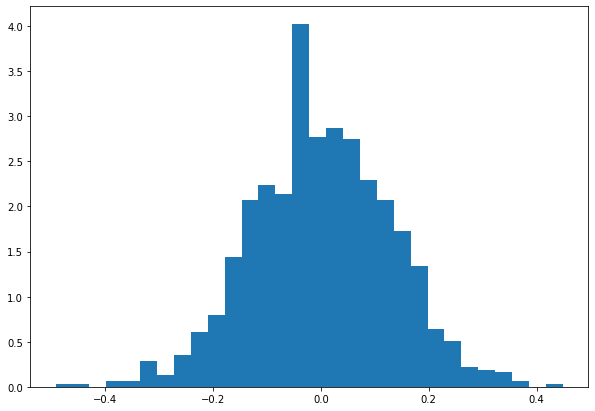

In [57]:
fig, ax = plt.subplots(figsize=(10,7))  # make one subplot (ax) on the figure
ax.hist(slopes,bins=30,density=True)
plt.show()

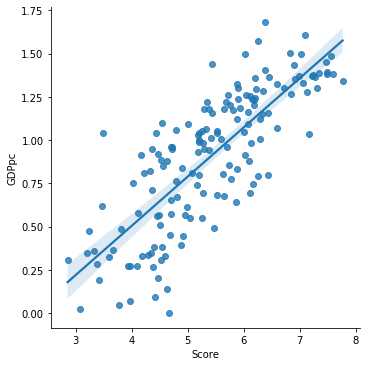

In [58]:
sns.lmplot(x='Score',y='GDPpc',data=happy)

The line above shows the %95 of the regression as this also, have upward sloping. 

We need to know what is the mean of the slopes in order create upperbound and lowerbound.

In [59]:
np.mean(np.array(slopes))

0.0010932829319335625

In [60]:
low=np.round(np.percentile(np.array(slopes),2.5),4)
high=np.round(np.percentile(np.array(slopes),97.5),4)
print("95 pct CI:","(",low,high,")")

95 pct CI: ( -0.2525 0.2559 )


In [61]:
import statsmodels.stats.api as sms

In [62]:
compare_mean = sms.CompareMeans(sms.DescrStatsW(happy['Score']), sms.DescrStatsW(happy['GDPpc']))

In [63]:
np.round(compare_mean.tconfint_diff(usevar='unequal'),4)

array([4.3153, 4.6886])

In [66]:
#for 99%
low=np.percentile(slopes,0.1)
high=np.percentile(slopes,99.0)
print("99 pct CI:",'[',bstar+low,',',bstar+high,']')

99 pct CI: [ 1.7781988631333272 , 2.5252920867599844 ]


In [67]:
#for 90%
low=np.percentile(slopes,10.0)
high=np.percentile(slopes,90.0)
print('[',bstar+low,',',bstar+high,']')

[ 2.062847527567138 , 2.383883276796478 ]
